### INFO 5502 Final Exam (05/12/2022, 500 points in total)

<span style='background:yellow'>**Question 1 (100 pt).**</span> We want to create a birthday frequency graph using the data on births in the United States, provided by the Centers for Disease Control (CDC). You can download the data from my GitHub link:https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/births.csv 

Please visualize the data as the following figure using python (you can use any data visualization packages):

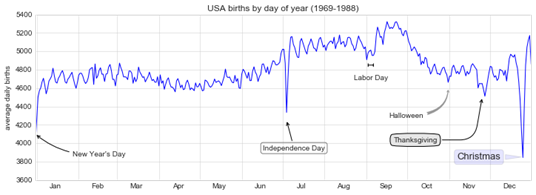

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548
Quartiles values are:  [4358.  4814.  5289.5]
Mean value:  4814.0
Standard deviation:  689.31
       year  month   day gender  births
0      1969      1   1.0      F    4046
1      1969      1   1.0      M    4440
2      1969      1   2.0      F    4454
3      1969      1   2.0      M    4548
4      1969      1   3.0      F    4548
...     ...    ...   ...    ...     ...
15062  1988     12  29.0      M    5944
15063  1988     12  30.0      F    5742
15064  1988     12  30.0      M    6095
15065  1988     12  31.0      F    4435
15066  1988     12  31.0      M    4698

[14610 rows x 5 columns]


/var/folders/v4/10qt1wxx4qj_knjbkmjdmpx40000gn/T/ipykernel_39902/3966600055.py:28: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


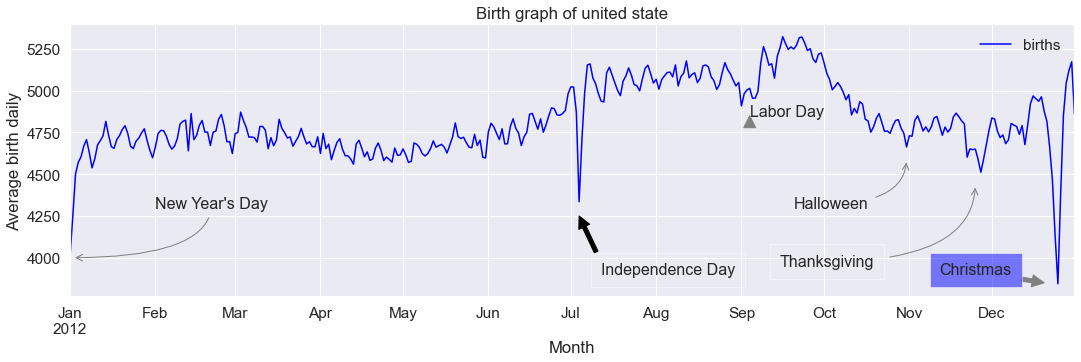

In [52]:
#### You code here
#1) QUESTION
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
birth_data = pd.read_csv("births.csv")
print(birth_data.head())

#Finding quartile first
quart = np.percentile(birth_data['births'], [25, 50, 75])
print("Quartiles values are: ",quart)
#using above quartile value
#mean value is index 1 of array
mean_value = quart[1]
standard_deviation = 0.74 * (quart[2] - quart[0])
print("Mean value: ", mean_value)
print("Standard deviation: ", standard_deviation)

#here creating a query for birth data using mean and standard deviation
birth_data = birth_data.query('(births > @mean_value - 5 * @standard_deviation) & (births < @mean_value + 5 * @standard_deviation)')
print(birth_data)

birth_data['day'] = birth_data['day'].astype(int)

birth_data.index = pd.to_datetime(10000 * birth_data.year + 100 * birth_data.month + birth_data.day, format='%Y%m%d')
births_by_date = birth_data.pivot_table('births', [birth_data.index.month, birth_data.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

#Just to display figure
fig, axis = plt.subplots(figsize=(18, 5))
births_by_date.plot(ax=axis,color=['blue'])

#To give text inside graph:
import matplotlib.patches as patches
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")
a3 = patches.FancyArrowPatch((-0.4, -0.6), (0.4, -0.6),
                             connectionstyle="arc3,rad=.5", **kw)
axis.annotate("New Year's Day", xy=('2012-1-1', 4000,), xytext=('2012-2-1', 4300),
            arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                 connectionstyle="angle3,angleA=90,angleB=0"),fontsize=16)
axis.annotate("Independence Day", xy=('2012-7-4', 4250), xytext=('2012-7-12', 3900),
            arrowprops=dict( color="black",
                                shrinkA=5, shrinkB=5,
                                 ),fontsize=16, bbox={'facecolor': 'none', 'alpha': 0.5, 'pad': 10})
axis.annotate("Labor Day", xy=('2012-9-4', 4850), xytext=('2012-9-4', 4850),
            arrowprops=dict( color="0.5",
                                shrinkA=5, shrinkB=5,
                                 connectionstyle="angle3,angleA=0,angleB=90"),fontsize=16)
axis.annotate("Halloween", xy=('2012-10-31', 4600), xytext=('2012-9-20', 4300),
            arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                 connectionstyle="angle3,angleA=0,angleB=90"),fontsize=16)
axis.annotate("Thanksgiving", xy=('2012-11-25', 4450), xytext=('2012-9-15', 3950),
            arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                 connectionstyle="angle3,angleA=0,angleB=90"),fontsize=16, bbox={'facecolor': 'none', 'alpha': 0.5, 'pad': 10})
axis.annotate("Christmas", xy=('2012-12-20', 3850), xytext=('2012-11-12', 3900),
            arrowprops=dict(color="0.5",
                                shrinkA=10, shrinkB=1),fontsize=16, bbox={'facecolor': 'blue', 'alpha': 0.5, 'pad': 10})

#Adding title and axis labels

axis.set_title('Birth graph of united state')

axis.set_xlabel('Month')
axis.set_ylabel('Average birth daily')

plt.style.use('seaborn-whitegrid')




<span style='background:yellow'>**Question 2 (100 pt).**</span> Write a python program to evaluate the text classification performance using accuracy, precision, recall, and f1 score. 

Accuracy = (TP + TN) / (TP+ TN+ FP+ FN)

Recall = (TP) / (TP+FN)

Precision = (TP) / (TP+FP)

F1 Score = (2*Precision*Recall) / (Precision + Recall)

Here is the confusion matrix of a text classfication task (six categories) on the testing data. 

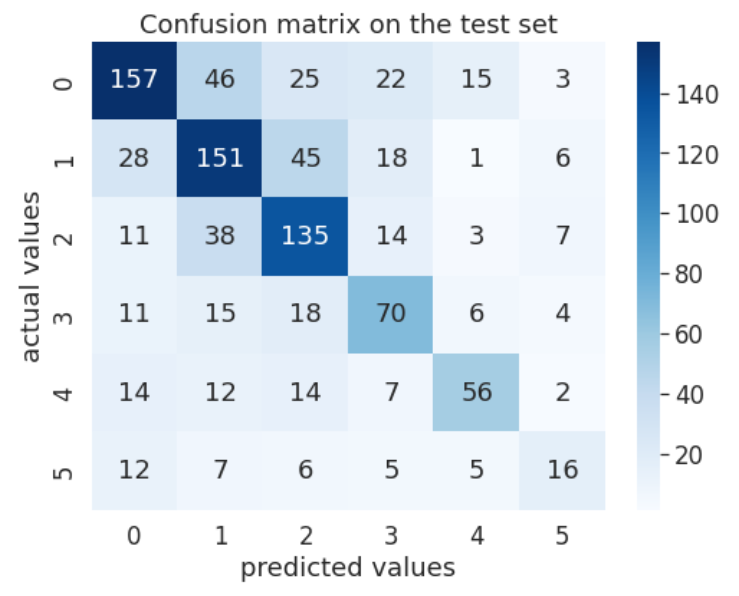

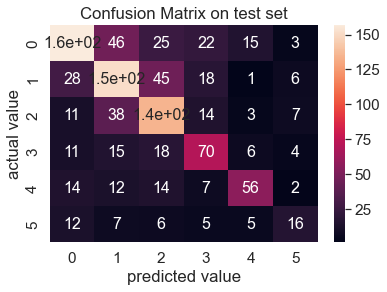

Class		Accuracy		Precision		Recall		F1 Score
0	0.8139303482587065	0.6738197424892703	0.585820895522388	0.626746506986028
1	0.7850746268656716	0.5613382899628253	0.606425702811245	0.583011583011583
2	0.8199004975124378	0.5555555555555556	0.6490384615384616	0.598669623059867
3	0.8805970149253731	0.5147058823529411	0.5645161290322581	0.5384615384615384
4	0.9213930348258706	0.6511627906976745	0.5333333333333333	0.5863874345549738
5	0.9432835820895522	0.42105263157894735	0.3137254901960784	0.3595505617977528


In [53]:
#### You code here
#2) QUESTION
import seaborn as sn
cm= [[157,46,25,22,15,3],
     [28,151,45,18,1,6],
     [11,38,135,14,3,7],
     [11,15,18,70,6,4],
     [14,12,14,7,56,2],
     [12,7,6,5,5,16]]

df_cm = pd.DataFrame(cm)
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.title("Confusion Matrix on test set")
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.show()

confusion_matrix_sum= sum(sum(cm,[]))

print("Class\t\tAccuracy\t\tPrecision\t\tRecall\t\tF1 Score")
for i in range(0,6):
  TP= cm[i][i]
  FP= cm[0][i]+ cm[1][i]+ cm[2][i]+  cm[3][i]+cm[4][i]+ cm[5][i] -  cm[i][i]
  FN=cm[i][0]+ cm[i][1]+ cm[i][2]+  cm[i][3]+cm[i][4]+ cm[i][5] -  cm[i][i]
  TN= confusion_matrix_sum-TP-FN-FP

  Accuracy= (TP + TN) / (TP+ TN+ FP+ FN)
  Recall= (TP) / (TP+FN)
  Precision= (TP) / (TP+FP)
  F1_Score = (2*Precision*Recall) / (Precision + Recall)
  print("{0}\t{1}\t{2}\t{3}\t{4}".format(f'{i}',f'{Accuracy}',f'{Precision}',f'{Recall}',f'{F1_Score}'))






<span style='background:yellow'>**Question 3 (200 pt).**</span> 

Part A: Given Inetd dataset, an intrusion detection dataset that contains 2 columns. The first column represents a process ID number (PID) and the second column represents a system call. The goal is to extract the entire system call sequence by its PID, then tokenize and parse each sequence into 25-grams. After this, we’ll split the data into training and testing sets. Next, we ensure data quality in the training dataset by removing duplicate sequences within each class and overlapped sequences between both classes. To ensure a fair evaluation, we also clean the testing set by repeating the previous step. You will implement a Decision Tree model to train and test on the training set and testing set that we just clean. 


Part B: As the data type is sequential, we want to know how similar the sequences from both classes are and visualize how the similarity scores vary in different sequence lengths. Compute a cosine similarity score of 100 random pairs from both classes and get a median cosine similarity. Repeat this step in different sequence lengths (5, 10, 15, and 20). Plot a line chart to visualize how the median cosine similarities vary through sequence lengths of 5 to 25. 

You can download the datasets from github: https://github.com/unt-iialab/info5502-spring2022/tree/main/finalexam/q4


Step by step instructions and questions:

(1)(30 points) Attached are the Normal and Intrusion data folders. Read in the data and store them in two separate dataframes. Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string. 

(2)(30 points) Parse an entire sequence into smaller sequences of size 25. (Hint: Use word_tokenize and ngrams from nltk library to parse).

(3)(30 points) Add labels to the data, and partition the labeled data into training data and testing data with a ratio of 70/30.

(4)(30 points) As the dataset has a lot of duplicate sequences, make sure that the testing data only contain unique sequences and that these sequences do not exist in the training data. Condense training data and testing data into two sets. Take the difference between the testing set and training set to remove the overlapped sequences from the testing data. 

(5)(30 points) The sequences from each class can be repetitive, and some of these sequences may have different labels. Therefore, we need to remove the duplicate sequences within each class and the overlapped sequences from the Intrusion class. Start out by separating the Normal class and Intrusion class in both training and testing data. Use the same concept in Question 4 to remove duplicate sequences and overlapped sequences from the training data.


(6)(50 points) Bootstrap the training data to get the same number of sequences from each class. Train and evaluate a Decision Tree model using the training data and testing data that we just clean. How is the performance?


In [54]:
#### You code here
#3) QUESTION
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.util import ngrams
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import statistics

intru_data = pd.read_csv("inetd-intrusion.int.txt", sep = " ", header = None)
normal_data = pd.read_csv("inetd-normal.int.txt", sep = " ", header = None)
#1) combining two column. one column for PID and another column for System Calls
intru_data.columns = ['PID', 'SystemCalls']
normal_data.columns = ['PID', 'SystemCalls']
print(intru_data)
print()
print(normal_data)
print()
print(intru_data.shape)
print()
print(normal_data.shape)

distinct_intrusion_data = {}
distinct_normal_data = {}

for PID in list(set(intru_data['PID'].values)):
    distinct_intrusion_data[PID] = " ".join(str(value) for value in list(intru_data[intru_data['PID'] == PID]['SystemCalls'].values))

for PID in list(set(normal_data['PID'].values)):
    distinct_normal_data[PID] = " ".join(str(value) for value in list(normal_data[normal_data['PID'] == PID]['SystemCalls'].values))

distinct_intrusion_data[167]

       PID  SystemCalls
0      167           90
1      167          125
2      167          125
3      167          106
4      167            5
...    ...          ...
8366  4470            6
8367  4470            6
8368  4470            6
8369  4470            6
8370  4470           11

[8371 rows x 2 columns]

      PID  SystemCalls
0     167           90
1     167          125
2     167          125
3     167          106
4     167            5
..    ...          ...
536  2669            6
537  2669            6
538  2669            6
539  2669            6
540  2669           11

[541 rows x 2 columns]

(8371, 2)

(541, 2)


'90 125 125 106 5 90 6 5 3 90 90 90 90 6 125 91 125 125 125 136 49 24 47 50 45 45 5 106 106 106 106 106 2 1'

In [55]:
#2) Parse an entire sequence into smaller sequences of size 25
intrusion_list = []
normal_list = []

for key_token in distinct_intrusion_data.keys():
    s = distinct_intrusion_data[key_token]
    token_word = [token for token in s.split(" ") if token != ""]

    for ele in list(ngrams(token_word, 25)):
        intrusion_list.append(ele)

for key_token in distinct_normal_data.keys():
    s = distinct_normal_data[key_token]
    token_word = [token for token in s.split(" ") if token != ""]

    for ele in list(ngrams(token_word, 25)):
        normal_list.append(ele)

print(len(intrusion_list))
print(len(normal_list))

7627
469


In [56]:
final_intrusion_data = pd.DataFrame(intrusion_list)
final_normal_data = pd.DataFrame(normal_list)

final_intrusion_data['class'] = 1
final_normal_data['class'] = 0

print(final_intrusion_data.shape)
print(final_normal_data.shape)

(7627, 26)
(469, 26)


In [57]:
final_dataframe = final_intrusion_data.append(final_normal_data)
print(final_dataframe.shape)

print(final_dataframe['class'].value_counts())
final_dataframe = final_dataframe.drop_duplicates(subset = final_dataframe.columns[:-1], keep = 'last')
print(final_dataframe.shape)

(8096, 26)
1    7627
0     469
Name: class, dtype: int64
(333, 26)


/var/folders/v4/10qt1wxx4qj_knjbkmjdmpx40000gn/T/ipykernel_39902/3485839241.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_dataframe = final_intrusion_data.append(final_normal_data)
/Users/rockingtimalsina/Documents/COLLEGE/GITHUB/python-INFO-5502/venv/lib/python3.10/site-packages/pandas/core/frame.py:6254: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  diff = Index(subset).difference(self.columns)


/Users/rockingtimalsina/Documents/COLLEGE/GITHUB/python-INFO-5502/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


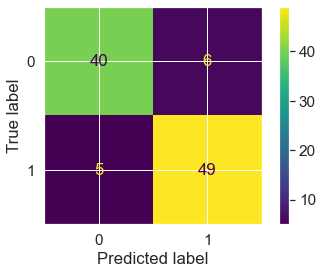

Accuracy percentage: 89.0
Confusion Matrix is describe below: 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        45
           1       0.91      0.89      0.90        55

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [58]:
#Desicion tree
# Here we will drop target column and also will split dataset
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import plot_confusion_matrix
A_data = final_dataframe.drop("class", axis = 1)
B_data = final_dataframe['class']
A_data_train, A_data_test, B_data_train, B_data_test = train_test_split(A_data, B_data, test_size = 0.3, random_state = 43)

decision_tree_model = DecisionTreeClassifier(max_depth = 15)
decision_tree_model.fit(A_data_train, B_data_train)

plot_confusion_matrix(decision_tree_model,A_data_test, B_data_test)
plt.show()
B_data_pred = decision_tree_model.predict(A_data_test)

print("Accuracy percentage: %s" % str(accuracy_score(B_data_test,B_data_pred)*100))
print("Confusion Matrix is describe below: ")
print(classification_report(B_data_pred, B_data_test))

In [59]:
# for ngram in range(5, 26, 5):
def ngram_Model_calculation(value):
    list_of_similar_value = []
    for x in range(0, 100):
        list_one = list(final_dataframe[final_dataframe['class'] == 0].sample(n = 1).iloc[0, :].values)
        list_two = list(final_dataframe[final_dataframe['class'] == 1].sample(n = 1).iloc[0, :].values)
        try:
            list_of_similar_value.append(cosine_similarity([list_one], [list_two]))
        except Exception as e:
            print(e)
            print(list_one, list_two)

    print(f"Value of Nin nGram Model: {value}, \nSimilarity Score: {statistics.median(list_of_similar_value)[0][0]}\n\n")
    return statistics.median(list_of_similar_value)[0][0]

ngram_cosine_similarity = {}
for y in range(5,26, 5):
    response = ngram_Model_calculation(y)
    ngram_cosine_similarity[y] = response


Value of Nin nGram Model: 5, 
Similarity Score: 0.7339686003566179


Value of Nin nGram Model: 10, 
Similarity Score: 0.7187830848033987


Value of Nin nGram Model: 15, 
Similarity Score: 0.7189643775237984


Value of Nin nGram Model: 20, 
Similarity Score: 0.71384419325469


Value of Nin nGram Model: 25, 
Similarity Score: 0.7326900858191565




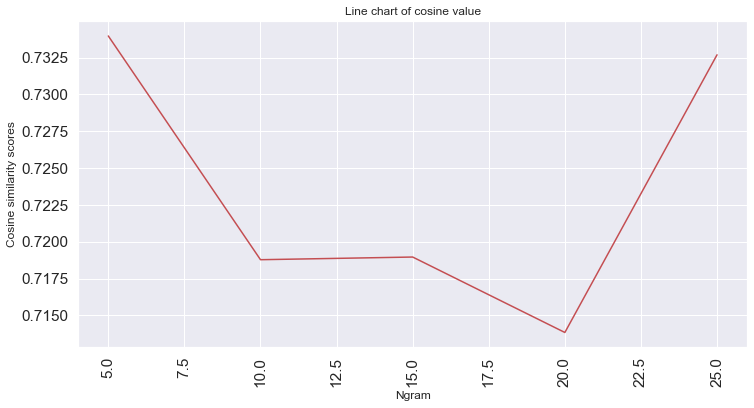

In [60]:
#Plot
ngram_cosine_model = pd.DataFrame({"N":list(ngram_cosine_similarity.keys()), "similar_value": list(ngram_cosine_similarity.values())})
plt.rcParams['figure.figsize'] = [12, 6]
sns.lineplot(x = "N", y = "similar_value", data = ngram_cosine_model, color = 'r')
plt.title("Line chart of cosine value",fontsize=12)
plt.xlabel("Ngram",fontsize=12)
plt.ylabel("Cosine similarity scores",fontsize=12)
plt.xticks(rotation = 90)
plt.show()


<span style='background:yellow'>**Question 4 (100 pt).**</span> In the world of business, the importance of the customers’ reviews for any product is not ignorable. The impact of customers’ reviews on customer’s decision making is significant. Therefore, businesses try to increase this impact by increasing the ratio of the positive reviews to negative reviews. One effective way to increase the ratio is offering the incentives such as small gifts or free next services to customers to post the reviews for item they purchase or used. However, it is not always the case, and customer may post their reviews without receiving or accepting the incentives. So, the reviews could be in either incentivized or non-incentivized category.


Considering the importance of reviews, in this question you need to compare these two categories of reviews. One method to compare the effectiveness of two categories is conducting the A/B testing.


The Software_Reviews dataset is collected from software review products, and it is combination of several small datasets. Find the dataset as an attachment on the left side of the page.


You can downlaod the dataset from github: https://github.com/unt-iialab/info5502-spring2022/blob/main/finalexam/Software_Reviews_csv_files_S.csv

(1)(50 points) Clean the dataset before you use (You need to know this dataset is combinations of the several CSV files with title rows. So, there are extra title rows in the middle of the file, which they need to be removed.)


(2)(50 points) Apply an A/B test": consider the “incentivized” column as main column for A & B groups.

a. The “incentivized” column includes ‘NominalGift’, ‘VendorReferredIncentivized’, ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’, ‘None’

b. Group A (Incentive): ‘NominalGift’, and ‘VendorReferredIncentivized’

c. Group B (NoIncentive): ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’

d. Make the decision if ‘None’ includes in either Group A or B or remove that.

e. The “OverAllRating” is another column that is used to compare groups A and B.

Which one A or B group has higher “OverAllRating”?

In [61]:
#### You code and your answer here here

#4) questions
import pandas as pd
import numpy as np
from scipy.stats import norm
import math as m
data_value = pd.read_csv("Software_Reviews_csv_files_S.csv")
data_value.head()

,Unnamed: 0.1,Unnamed: 0,id,status,global_review_id,hash_global_review_id,listing_id,title,is_rating,score,...,is_verified,full_name,company_industry,frequency_of_use,time_used,source,incentivized,ReviewDescription_score,Pros_score,Unnamed: 27
0,0.0,0,13879,Published,GetApp___14383,f7535d1342,90666,The best CRM solution we've found,FALSE,4.462893,...,TRUE,Marcus B.,Information Technology and Services,NaN,1-2 years,GetApp,NaN,0.993886769,0.994333982,1.850533e+04
1,1.0,1,1283833,Published,SoftwareAdvice___434035,8b72a5b935,90666,Reasonable CRM software for small businesses,FALSE,4.462893,...,FALSE,Rushang D.,Marketing and Advertising,daily,2+ years,SoftwareAdvice,NominalGift,0.998566568,0.99880743,1.711777e+06
2,2.0,2,841881,Published,Capterra___330384,0d580775b7,90666,"Security certificate warning, basic lists inac...",FALSE,4.462893,...,FALSE,Julian G.,Computer Hardware,daily,6-12 months,Capterra,NominalGift,0.999743998,0.996420145,1.122507e+06
3,3.0,3,1060237,Published,SoftwareAdvice___390950,a36d0ef509,90666,1CRM is a great started CRM for a Service Company,FALSE,4.462893,...,FALSE,James C.,Management Consulting,daily,1-2 years,SoftwareAdvice,NominalGift,0.938319802,0.986604214,1.413648e+06
4,4.0,4,13939,Published,GetApp___14453,efc7312240,90666,Excellent business management app for the SMB ...,FALSE,4.462893,...,TRUE,Jacques G.,Telecommunications,NaN,1-2 years,GetApp,NaN,0.985312879,0.996334434,1.858400e+04


In [62]:
group_A = data_value[(data_value['incentivized'] == "NominalGift") | (data_value['incentivized'] == "VendorReferredIncentivized")]['OverAllRating']
group_B = data_value[(data_value['incentivized'] == "NoIncentive") | (data_value['incentivized'] == "NonNominalGift") | (data_value['incentivized'] == "VendorReferred")]['OverAllRating']

control_shape = group_A.shape[0]
experimental_shape = group_B.shape[0]

print("Control shape Value:", control_shape)
print("Experimental shape value:", experimental_shape)

Control shape Value: 1015
Experimental shape value: 1306


In [63]:
print("In order to calculate mean value of control and experimental group\n\n")
mean_value_con = np.mean(group_A)
mean_value_exp = np.mean(group_B)

var1 = group_A.astype('float64')
variance_for_control = np.var(var1)
print("Variance of Control value: ",variance_for_control)

var2 = group_B.astype('float64')
variance_for_exp = np.var(var2)

x = variance_for_control/control_shape + variance_for_exp/experimental_shape
pooled_variance = m.sqrt(x)

y = mean_value_con-mean_value_exp

#Here to calculate test statistics stat
test_stat = y/pooled_variance
print("Value of test statistics stat: ", test_stat)

# Here to calculate p_value
p_value = norm.sf(test_stat)*2
print("Value of p_value: ", p_value)

#Here to calculate z-critical
alpha = 0.05
z_critical  = norm.ppf(1-alpha/2)
print("value of z-critical: ", z_critical)

#Here to calculate margin of error
margin_of_error = z_critical*pooled_variance

#Here to calcualate confidence-interval
confindence_interval = [y - margin_of_error, y + margin_of_error]

print("Confidence Interval of 2 sample: ", np.round(confindence_interval,2))

In order to calculate mean value of control and experimental group


Variance of Control value:  0.7380193647018857
Value of test statistics stat:  nan
Value of p_value:  nan
value of z-critical:  1.959963984540054
Confidence Interval of 2 sample:  [nan nan]


/var/folders/v4/10qt1wxx4qj_knjbkmjdmpx40000gn/T/ipykernel_39902/89285804.py:15: RuntimeWarning: invalid value encountered in double_scalars
  y = mean_value_con-mean_value_exp


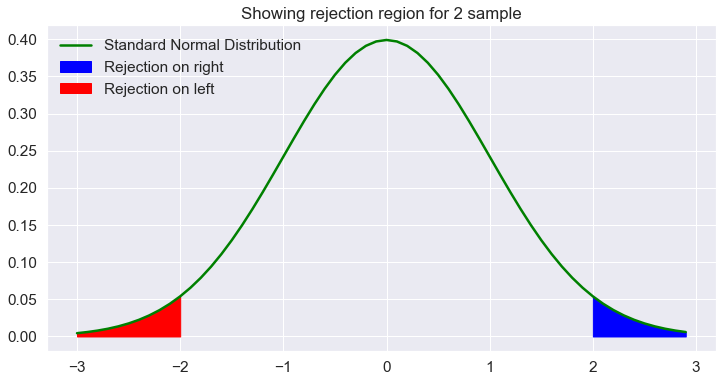

In [64]:
import matplotlib.pyplot as plt
p = np.arange(-3 , 3, 0.1)
plt.plot(p, norm.pdf(p), label = 'Standard Normal Distribution',color = 'green',linewidth = 2.5)
plt.fill_between(p[p>z_critical], norm.pdf(p[p>z_critical]), label = 'Rejection on right',color ='blue' )
plt.fill_between(p[p<(-1)*z_critical], norm.pdf(p[p<(-1)*z_critical]), label = 'Rejection on left', color ='red' )
plt.title("Showing rejection region for 2 sample")
plt.legend()
plt.show()


